In [1]:
%matplotlib inline
import spacy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Imports de librerias de preprocesamiento de texto
import re, string, unicodedata
import nltk
import contractions
import inflect
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
data = pd.read_csv("../data/train.csv", index_col="id", parse_dates=["fecha"]).reset_index()
data["tipodepropiedad"] = data["tipodepropiedad"].map(lambda x: str(x).lower())
data["descripcion"] = data["descripcion"].astype('str')

# Limpieza de descripciones

In [3]:
def apply_batery_functions(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = denoise_text(text)
    return replace_contractions(text)
    
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text

def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

In [4]:
data["descripcion"].fillna(value="",inplace=True)

In [5]:
data.loc[:, "descripcion"] = data.descripcion.apply(lambda x: strip_html(x))

/usr/local/lib/python3.7/site-packages/bs4/__init__.py:294: UserWarning: "b'.'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
/usr/local/lib/python3.7/site-packages/bs4/__init__.py:294: UserWarning: "b'/'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)


In [7]:
#####Recategorizacion

tipo_vivienda = ["apartamento", "casa en condominio", "casa",
                 "villa", "duplex", "departamento compartido", "hospedaje", "quinta vacacional"]
tipo_comercial = ["terreno comercial", "local comercial", "oficina comercial", 
                  "local en centro comercial", "bodega comercial", "inmuebles productivos urbanos"]

tipo_inversion = ["casa uso de suelo", "terreno", "edificio", "huerta", "lote", "garage", "otros", "nave industrial",  "rancho"]
undefined = ["otros", "nan"]  

def get_ancester_category(tipo_de_propiedad):
    if (tipo_de_propiedad in tipo_inversion): return "inversion"

    if (tipo_de_propiedad in tipo_comercial): return "comercial"

    if (tipo_de_propiedad in tipo_vivienda): return "vivienda"

    return "undefined"

data["categoria_padre"] = data["tipodepropiedad"].apply(lambda x: get_ancester_category(x))

In [8]:
data["categoria_padre"].value_counts()

vivienda     219575
inversion     12455
comercial      7893
undefined        77
Name: categoria_padre, dtype: int64

In [5]:
vivienda = data[data["categoria_padre"] == "vivienda"]

In [14]:
nlp = spacy.load("es")

def normalize(text):
    doc = nlp(text)
    #eliminacion de palabras comunes en el vocabulario español (conjunciones, preposiciones y verbos comunes)
    words = [t.orth_ for t in doc if not t.is_punct | t.is_stop]
    #se descartan palabras muy cortas
    lexical_tokens = [t.lower() for t in words if len(t) > 3 and t.isalpha()]
    return lexical_tokens

word_list = normalize("“Soy un texto de prueba. ¿Cuántos tokens me quedarán después de la normalización?”")

In [19]:
print(word_list)

['texto', 'prueba', 'tokens', 'quedarán', 'normalización']


In [23]:
vivienda_text = []

In [24]:
for descripcion in vivienda["descripcion"]:
    vivienda_text.extend(normalize(descripcion))

In [25]:
print ("Hay {} palabras en la combinacion de descripciones para la categoria {}.".format(len(vivienda_text),"vivienda"))

Hay 7453678 palabras en la combinacion de descripciones para la categoria vivienda.


In [26]:
text_vivienda = " ".join(word for word in vivienda_text)

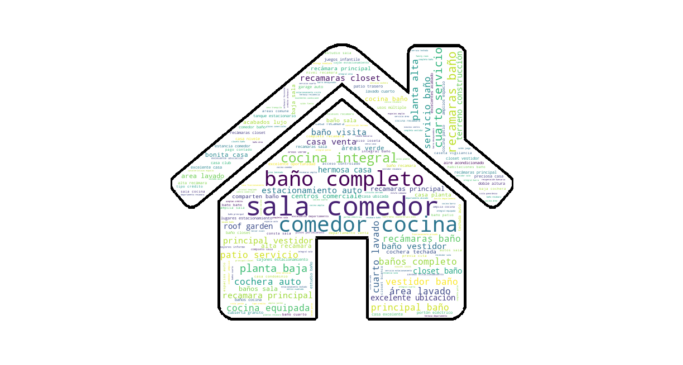

In [107]:
char_mask = np.array(Image.open("../notebooks/img/house3.png"))

# Generate a word cloud image
wordcloud_vivienda = WordCloud(background_color="white", max_words=200, width=400, \
                      height=400, mask=char_mask,contour_width=3, random_state=1).generate(text_vivienda)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(12,10))
plt.imshow(wordcloud_vivienda, interpolation='bilinear')
plt.axis("off")
plt.show()
#wordcloud_vivienda.to_file("../notebooks/img/wordcloudVivienda.png")

In [108]:
wordcloud_vivienda.to_file("../notebooks/img/wordcloudVivienda2.png")

# Inversion

In [54]:
inversion = data[data["categoria_padre"] == "inversion"]

In [55]:
inversion_text = []

In [56]:
for descripcion in inversion["descripcion"]:
    inversion_text.extend(normalize(descripcion))

In [57]:
print ("Hay {} palabras en la combinacion de descripciones para la categoria {}.".format(len(inversion_text),"inversion"))

Hay 267116 palabras en la combinacion de descripciones para la categoria inversion.


In [58]:
text_inversion = " ".join(word for word in inversion_text)

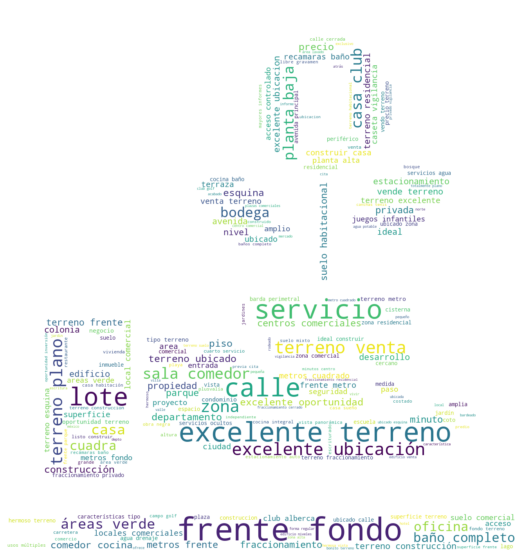

In [106]:
char_mask = np.array(Image.open("../notebooks/img/investmentIcon1.jpg"))

# Generate a word cloud image
wordcloud_inversion = WordCloud(background_color="white", max_words=200, width=400, \
                      height=400, mask=char_mask, random_state=1).generate(text_inversion)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(12,10))
plt.imshow(wordcloud_inversion, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud_inversion.to_file("../notebooks/img/wordcloudInversion4.png")

# Comercial

In [60]:
comercial = data[data["categoria_padre"] == "comercial"]

In [61]:
comercial_text = []

In [62]:
for descripcion in comercial["descripcion"]:
    comercial_text.extend(normalize(descripcion))

In [63]:
print ("Hay {} palabras en la combinacion de descripciones para la categoria {}.".format(len(comercial_text),"comercial"))

Hay 190153 palabras en la combinacion de descripciones para la categoria comercial.


In [64]:
text_comercial = " ".join(word for word in comercial_text)

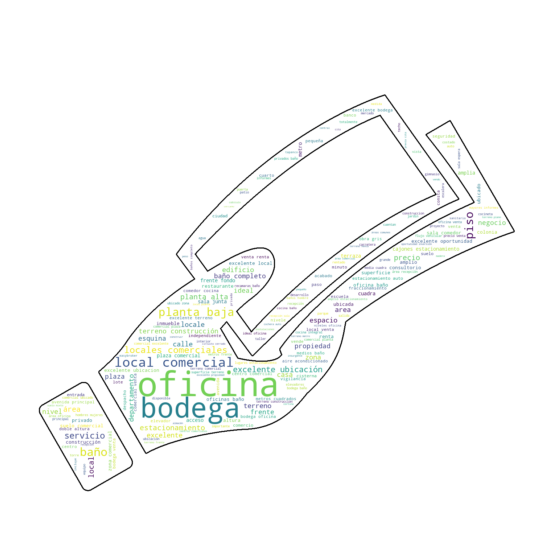

In [104]:
char_mask = np.array(Image.open("../notebooks/img/handPayIcon.jpg"))

# Generate a word cloud image
wordcloud_comercial = WordCloud(background_color="white", max_words=200, width=400, \
                      height=400, mask=char_mask,contour_width=3, random_state=1).generate(text_comercial)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(12,10))
plt.imshow(wordcloud_comercial, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud_comercial.to_file("../notebooks/img/wordcloudComercial2.png")

# Undefined

In [11]:
undefined = data[data["categoria_padre"] == "undefined"]

In [12]:
undefined_text = []

In [15]:
for descripcion in undefined["descripcion"]:
    undefined_text.extend(normalize(descripcion))

In [16]:
print ("Hay {} palabras en la combinacion de descripciones para la categoria {}.".format(len(undefined_text),"undefined"))

Hay 1603 palabras en la combinacion de descripciones para la categoria undefined.


In [18]:
text_undefined = " ".join(word for word in undefined_text)

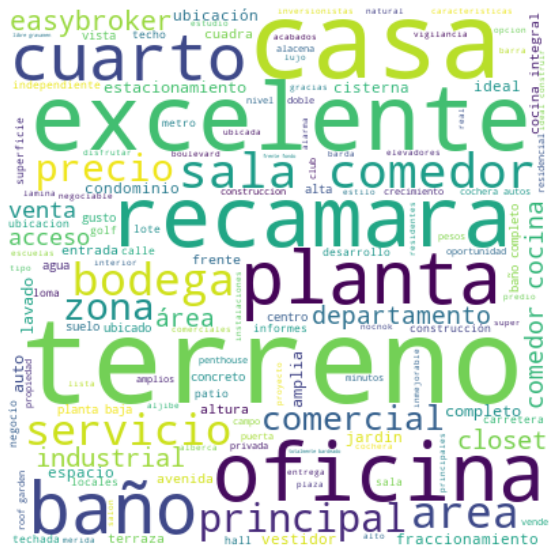

In [20]:
# Generate a word cloud image
wordcloud_undefined = WordCloud(background_color="white", max_words=200, width=400, \
                      height=400, random_state=1).generate(text_undefined)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(12,10))
plt.imshow(wordcloud_undefined, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud_undefined.to_file("../notebooks/img/wordcloudUndefined.png")